# 0.) Import the US Perminent Visas using zip extractor

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
pd.set_option('display.max_columns', None)
df.head(20)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,

In [7]:
df_select = df[["case_status", "country_of_citzenship",'employer_state','us_economic_sector','class_of_admission']]

In [8]:
df_select

,case_status,country_of_citzenship,employer_state,us_economic_sector,class_of_admission
0,Certified,ARMENIA,NY,IT,J-1
1,Denied,POLAND,NY,Other Economic Sector,B-2
2,Certified,INDIA,VA,Aerospace,H-1B
3,Certified,SOUTH KOREA,NY,Other Economic Sector,B-2
4,Certified,CANADA,NY,Advanced Mfg,L-1
...,...,...,...,...,...
374357,Withdrawn,NaN,CA,NaN,NaN
374358,Withdrawn,NaN,WA,NaN,L-1
374359,Withdrawn,NaN,MI,NaN,H-1B
374360,Withdrawn,NaN,AZ,NaN,B-2


# 3.) Clean your data for a decision tree


In [9]:
X = pd.get_dummies(df_select.drop(['case_status'],axis=1),drop_first=True)
y = df["case_status"]

In [10]:
X

,country_of_citzenship_ALBANIA,country_of_citzenship_ANGOLA,country_of_citzenship_ARGENTINA,country_of_citzenship_ARMENIA,country_of_citzenship_AUSTRALIA,country_of_citzenship_AUSTRIA,country_of_citzenship_AZERBAIJAN,country_of_citzenship_BAHAMAS,country_of_citzenship_BAHRAIN,country_of_citzenship_BANGLADESH,country_of_citzenship_BARBADOS,country_of_citzenship_BELARUS,country_of_citzenship_BELGIUM,country_of_citzenship_BELIZE,country_of_citzenship_BHUTAN,country_of_citzenship_BOLIVIA,country_of_citzenship_BOSNIA AND HERZEGOVINA,country_of_citzenship_BRAZIL,country_of_citzenship_BULGARIA,country_of_citzenship_BURKINA FASO,country_of_citzenship_BURMA (MYANMAR),country_of_citzenship_CAMBODIA,country_of_citzenship_CAMEROON,country_of_citzenship_CANADA,country_of_citzenship_CHILE,country_of_citzenship_CHINA,country_of_citzenship_COLOMBIA,country_of_citzenship_COSTA RICA,country_of_citzenship_CROATIA,country_of_citzenship_CYPRUS,country_of_citzenship_CZECH REPUBLIC,country_of_citzenship_DENMARK,country_of_citzenship_DOMINICA,country_of_citzenship_DOMINICAN REPUBLIC,country_of_citzenship_ECUADOR,country_of_citzenship_EGYPT,country_of_citzenship_EL SALVADOR,country_of_citzenship_ESTONIA,country_of_citzenship_ETHIOPIA,country_of_citzenship_FIJI,country_of_citzenship_FINLAND,country_of_citzenship_FRANCE,country_of_citzenship_GAMBIA,country_of_citzenship_GEORGIA,country_of_citzenship_GERMANY,country_of_citzenship_GHANA,country_of_citzenship_GREECE,country_of_citzenship_GRENADA,country_of_citzenship_GUATEMALA,country_of_citzenship_GUINEA,country_of_citzenship_GUYANA,country_of_citzenship_HAITI,country_of_citzenship_HONDURAS,country_of_citzenship_HONG KONG,country_of_citzenship_HUNGARY,country_of_citzenship_ICELAND,country_of_citzenship_INDIA,country_of_citzenship_INDONESIA,country_of_citzenship_IRAN,country_of_citzenship_IRAQ,country_of_citzenship_IRELAND,country_of_citzenship_ISRAEL,country_of_citzenship_ITALY,country_of_citzenship_IVORY COAST,country_of_citzenship_JAMAICA,country_of_citzenship_JAPAN,country_of_citzenship_JORDAN,country_of_citzenship_KAZAKHSTAN,country_of_citzenship_KENYA,country_of_citzenship_KOSOVO,country_of_citzenship_KUWAIT,country_of_citzenship_KYRGYZSTAN,country_of_citzenship_LAOS,country_of_citzenship_LATVIA,country_of_citzenship_LEBANON,country_of_citzenship_LESOTHO,country_of_citzenship_LIBERIA,country_of_citzenship_LIBYA,country_of_citzenship_LITHUANIA,country_of_citzenship_MACEDONIA,country_of_citzenship_MALAYSIA,country_of_citzenship_MALI,country_of_citzenship_MALTA,country_of_citzenship_MAURITIUS,country_of_citzenship_MEXICO,country_of_citzenship_MOLDOVA,country_of_citzenship_MONGOLIA,country_of_citzenship_MOROCCO,country_of_citzenship_NEPAL,country_of_citzenship_NETHERLANDS,country_of_citzenship_NEW ZEALAND,country_of_citzenship_NICARAGUA,country_of_citzenship_NIGERIA,country_of_citzenship_NORTH KOREA,country_of_citzenship_NORWAY,country_of_citzenship_OMAN,country_of_citzenship_PAKISTAN,country_of_citzenship_PALESTINE,country_of_citzenship_PANAMA,country_of_citzenship_PARAGUAY,country_of_citzenship_PERU,country_of_citzenship_PHILIPPINES,country_of_citzenship_POLAND,country_of_citzenship_PORTUGAL,country_of_citzenship_ROMANIA,country_of_citzenship_RUSSIA,country_of_citzenship_RWANDA,country_of_citzenship_SAUDI ARABIA,country_of_citzenship_SENEGAL,country_of_citzenship_SERBIA AND MONTENEGRO,country_of_citzenship_SIERRA LEONE,country_of_citzenship_SINGAPORE,country_of_citzenship_SLOVAKIA,country_of_citzenship_SLOVENIA,country_of_citzenship_SOUTH AFRICA,country_of_citzenship_SOUTH KOREA,country_of_citzenship_SPAIN,country_of_citzenship_SRI LANKA,country_of_citzenship_ST KITTS AND NEVIS,country_of_citzenship_ST LUCIA,country_of_citzenship_ST VINCENT,country_of_citzenship_SUDAN,country_of_citzenship_SWEDEN,country_of_citzenship_SWITZERLAND,country_of_citzenship_SYRIA,country_of_citzenship_TAIWAN,country_of_citzenship_TAJIKISTAN,country_of_citzenship_TANZANIA,country_of_citzenship_THAILAND,country_of_citzenship_T

# 4.) Fit and plot a decision tree of depth X


In [12]:
from sklearn import tree

In [19]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'class_of_admission_H-1B <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.7, 'class_of_admission_L-1 <= 0.5\ngini = 0.642\nsamples = 91344\nvalue = [42621, 31744, 11336, 5643]'),
 Text(0.125, 0.5, 'class_of_admission_EWI <= 0.5\ngini = 0.66\nsamples = 71406\nvalue = [32675, 22948, 10777, 5006]'),
 Text(0.0625, 0.3, 'employer_state_SOUTH CAROLINA <= 0.5\ngini = 0.656\nsamples = 69451\nvalue = [32163, 22396, 9963, 4929]'),
 Text(0.03125, 0.1, 'gini = 0.657\nsamples = 68441\nvalue = [31467, 22300, 9855, 4819]'),
 Text(0.09375, 0.1, 'gini = 0.493\nsamples = 1010\nvalue = [696, 96, 108, 110]'),
 Text(0.1875, 0.3, 'country_of_citzenship_MEXICO <= 0.5\ngini = 0.677\nsamples = 1955\nvalue = [512, 552, 814, 77]'),
 Text(0.15625, 0.1, 'gini = 0.68\nsamples = 1788\nvalue = [464, 546, 711, 67]'),
 Text(0.21875, 0.1, 'gini = 0.532\nsamples = 167\nvalue = [48, 6, 103, 10]'),
 Text(0.375, 0.5, 'employer_state_TEXAS <= 0.5\ngini = 0.555\ns

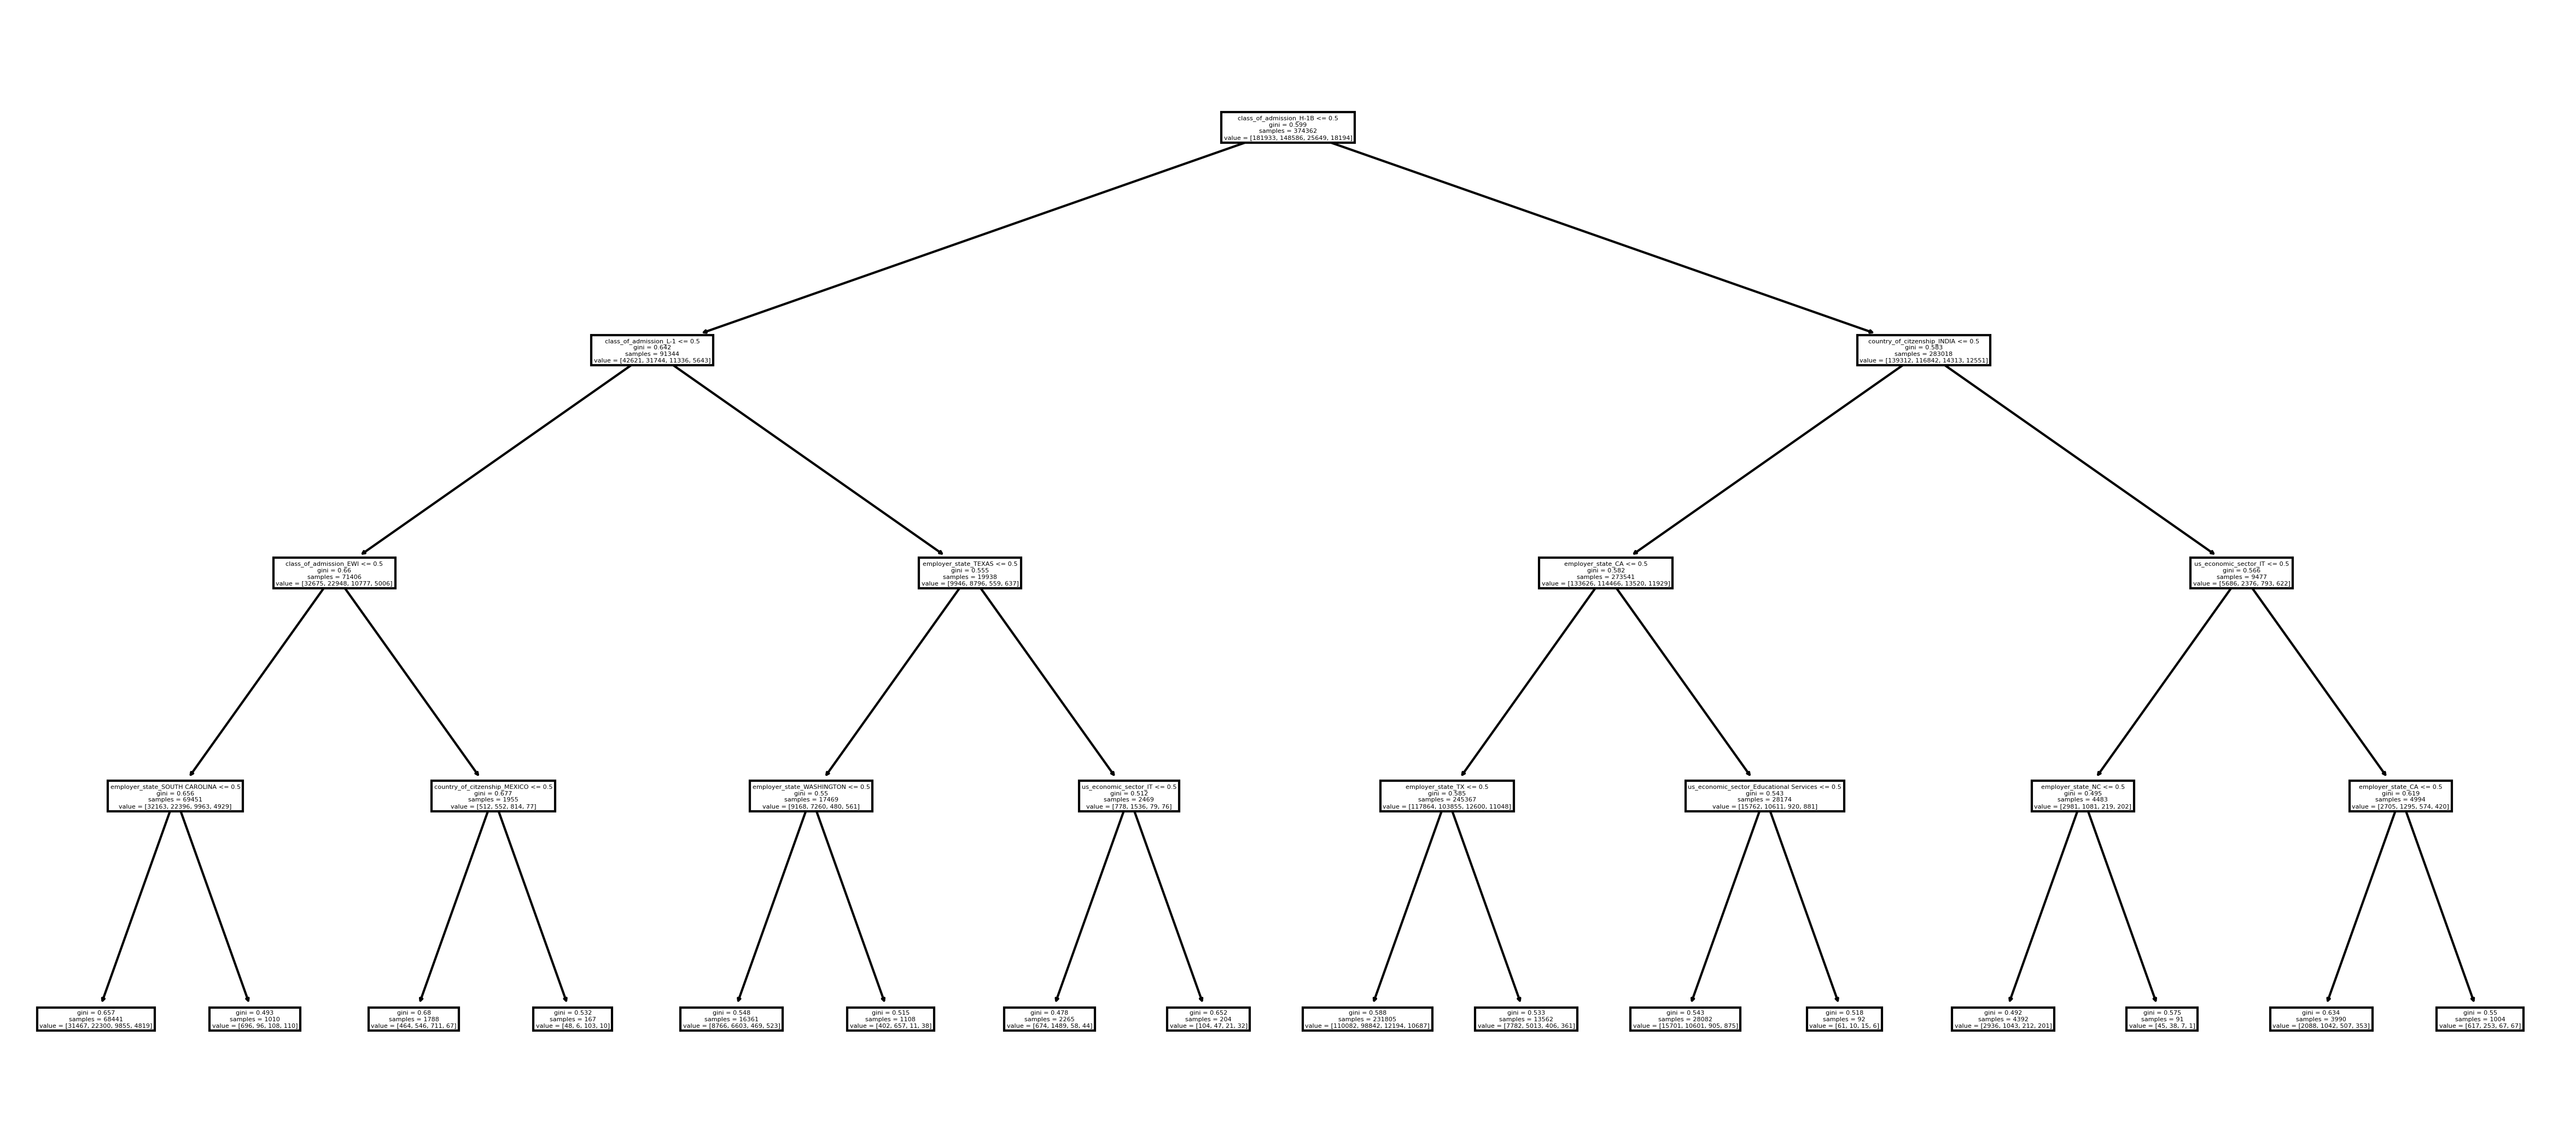

In [20]:
plt.figure(figsize = (20,9),dpi=300)
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node by sample size is Class of addmission is H-1B, not from india, employer is not from CA and employer is not from TX, but it still doesn't end up with a clean classification and contains values from all case statuses. We either need to increase the tree depth or choose different features to solve the classification problem. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [24]:
from sklearn.model_selection import train_test_split

max_depths = [1,2,3,4,5,6]
outputs = []

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, train_size=0.8, random_state=1)

for md in max_depths:
  clf2 = tree.DecisionTreeClassifier(max_depth = md)
  clf2.fit(X_Train,Y_Train)

  oos_accuracy =  clf2.score(X_Test,Y_Test)
  outputs.append(oos_accuracy)
print(outputs)

[0.4857959478049497, 0.4857959478049497, 0.4890280875616043, 0.4897092409813952, 0.49280782124397315, 0.4947711458068997]


While the accuraccies of all tested depths aren't that great, it is clear that it is increasing as depth increases. We might need to select different features through better feature selection methods to improve the accuracy of our model further. 